## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

## Read Dataset

In [2]:
iris = pd.read_csv("Data.csv")

In [3]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')

In [5]:
columns=['Sepal_length', "Sepal_width", "Petal_length", "Petal_width", "Class"]

In [6]:
iris.columns = columns

In [7]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  149 non-null    float64
 1   Sepal_width   149 non-null    float64
 2   Petal_length  149 non-null    float64
 3   Petal_width   149 non-null    float64
 4   Class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
iris.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.842953,3.054362,3.749664,1.194631
std,0.830846,0.435034,1.766911,0.764127
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris["Class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: Class, dtype: int64

## Detect Null Values

In [11]:
iris.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Class           0
dtype: int64

## Plot Histograms

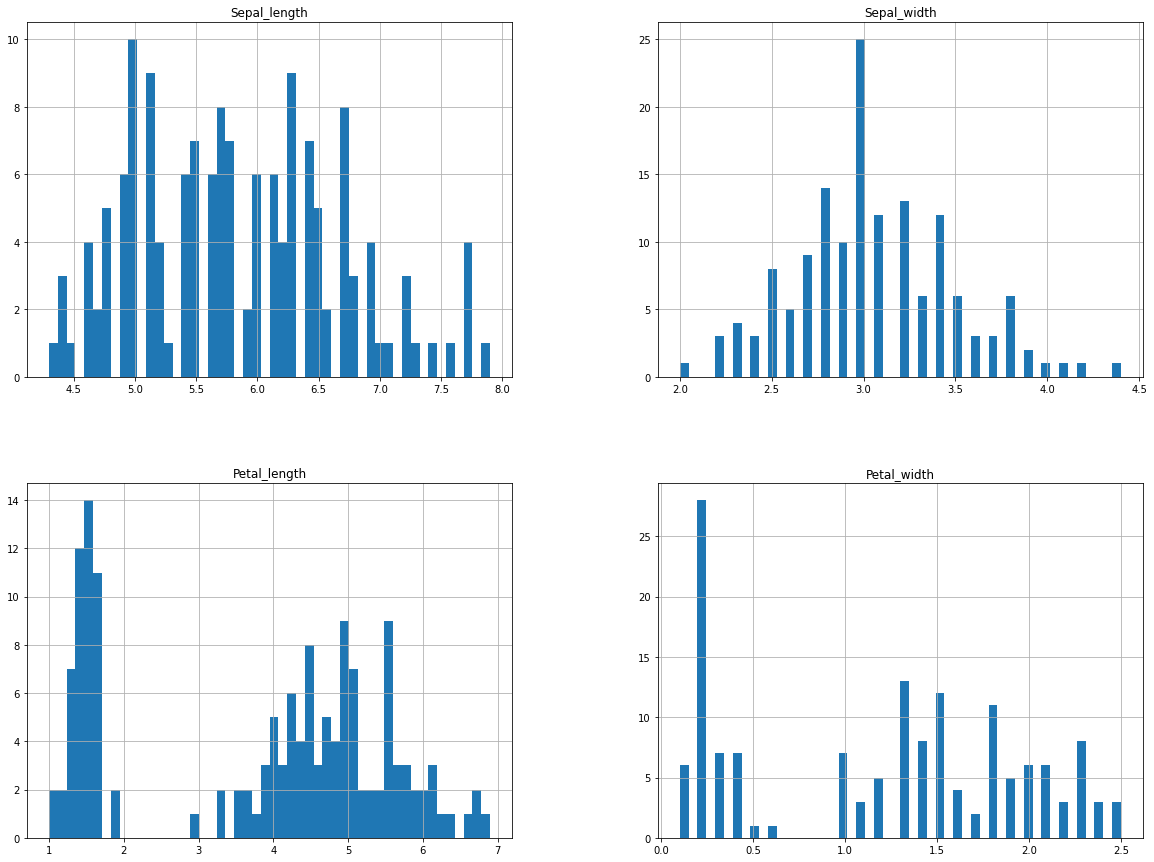

In [12]:
iris.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Matrix Plot')

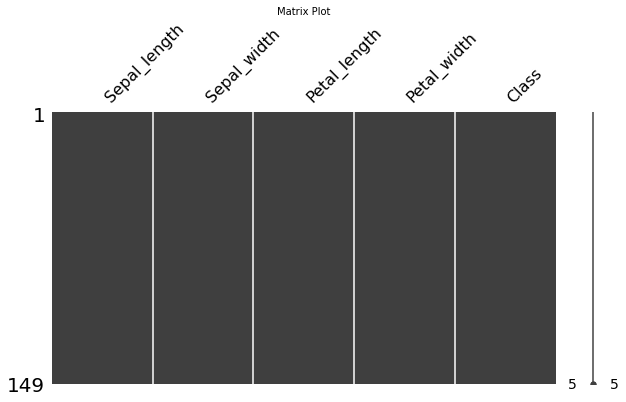

In [13]:
ms.matrix(iris, figsize=(10,5))
plt.title("Matrix Plot", size=10)

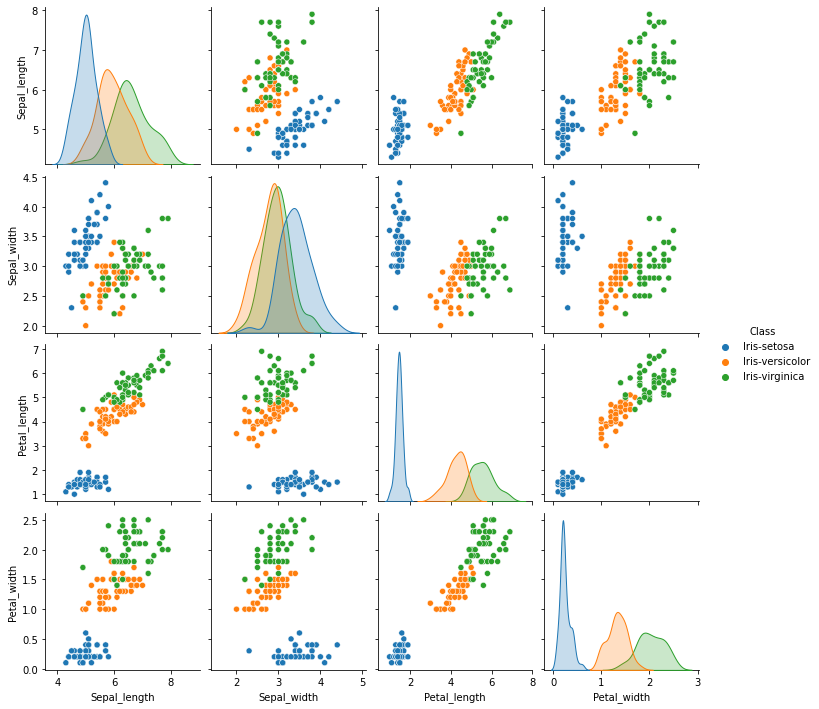

In [14]:
sns.pairplot(data = iris, hue="Class")

## Train-Test splitting

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
lb = LabelEncoder()
iris["Class"] = lb.fit_transform(iris["Class"].values)

In [17]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
x = iris.drop(columns=["Class"])
y = iris["Class"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

## Libraries For Diffrent Models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#Logitic Regreesion
l_regression = LogisticRegression()
l_regression.fit(x_train, y_train)
l_score = round(l_regression.score(x_train, y_train)*100,2)
print("Accuracy of Logistic Regression:- ",l_score)

Accuracy of Logistic Regression:-  98.32


C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#Decision Tree 
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
dtree_score = round(d_tree.score(x_train, y_train)*100,2)
print("Accuracy of Decision Tree:- ",dtree_score)

Accuracy of Decision Tree:-  100.0


In [22]:
#Random Forest Classifier
r_forest = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
r_forest.fit(x_train, y_train)
r_score = round(r_forest.score(x_train, y_train)*100,2)
print("Accuracy of Random Forest Classifier:- ",r_score)

Accuracy of Random Forest Classifier:-  100.0


In [23]:
#K Nearest Algo
k = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
k.fit(x_train, y_train)
k_score = round(k.score(x_train, y_train)*100,2)
print("Accuracy of K Nearest Algorithm:- ",k_score)

Accuracy of K Nearest Algorithm:-  97.48


In [24]:
sel = pd.DataFrame({"Models":["Logistic Regression", "Decision Tree", "Random Forest", "K-Nearest"],
                   "Accuracy":[l_score, dtree_score, r_score, k_score]})
sel.sort_values(by="Accuracy", ascending=False)

,Models,Accuracy
1,Decision Tree,100.00
2,Random Forest,100.00
0,Logistic Regression,98.32
3,K-Nearest,97.48


Text(0.5, 1.0, 'Bar Plot For Compare Score From Diffrent Models')

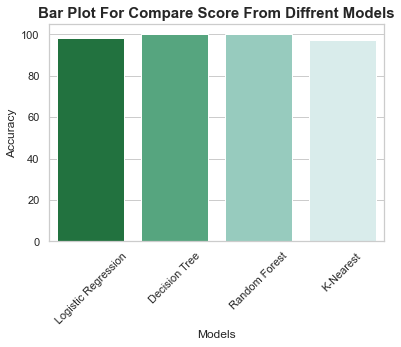

In [25]:
sns.set_theme(style="whitegrid")
sns.barplot(x="Models", y="Accuracy", data=sel, palette="BuGn_r");
plt.xticks(rotation=45)
plt.title("Bar Plot For Compare Score From Diffrent Models", weight="bold", size=15)

# Decision Tree & Random Forest is a Good Choice For this Dataset